In [1]:
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
data_path = "D:\!!!MAAykanat Dosyalar\MAA_Own_Study\organised_data_final.csv"

In [3]:
solar_energy_data = pd.read_csv(data_path, sep=";")

In [4]:
solar_energy_data.head()

,YEAR,MONTH,DAY,HOUR,WDS,MXT,MNT,TMP,PRC,PRS,RLH,SSI,GSR,OUP
0,2016,6,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2016,6,17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2016,6,17,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2016,6,17,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2016,6,17,4,NaN,44754.0,44753.0,44693.0,0.0,848.3,80.0,0.0,0.0,0.0


In [5]:
solar_energy_data.describe()

,YEAR,MONTH,DAY,HOUR,WDS,MXT,MNT,TMP,PRC,PRS,RLH,SSI,GSR,OUP
count,10032.000000,10032.000000,10032.000000,10032.000000,7964.000000,8867.000000,8867.000000,8686.000000,8416.000000,9848.000000,8686.000000,9458.000000,9443.000000,9.469000e+03
mean,2016.526316,6.571770,15.787081,11.500000,31732.010083,31126.676023,30597.777546,31029.242448,254.761740,846.087287,55.252245,5536.597367,2161.611744,1.628303e+05
std,0.499332,3.232158,8.864925,6.922532,20264.773007,20550.028294,20770.479598,20592.338236,3363.805277,3.477579,23.115186,13859.776470,9066.783365,2.972782e+05
min,2016.000000,1.000000,1.000000,0.000000,0.000000,-19.600000,-20.900000,-20.600000,0.000000,831.700000,5.000000,0.000000,0.000000,0.000000e+00
25%,2016.000000,4.000000,8.000000,5.750000,2.000000,22.000000,10.000000,18.000000,0.000000,844.100000,36.000000,0.000000,0.000000,0.000000e+00
50%,2017.000000,7.000000,16.000000,11.500000,44621.000000,44632.000000,44632.000000,44636.000000,0.000000,846.200000,55.000000,0.900000,40.800000,1.882200e+02
75%,2017.000000,9.000000,23.000000,17.250000,44713.000000,44732.000000,44733.000000,44730.000000,0.000000,848.200000,74.000000,64.590000,512.650000,1.760790e+05
max,2017.000000,12.000000,31.000000,23.000000,44812.000000,44834.000000,44834.000000,44834.000000,44809.000000,856.300000,100.000000,47453.000000,44834.000000,1.000828e+06


In [6]:
# As it can see below, data has numeric values. It is better to approach regression problem to predict OUP

In [7]:
solar_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10032 entries, 0 to 10031
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    10032 non-null  int64  
 1   MONTH   10032 non-null  int64  
 2   DAY     10032 non-null  int64  
 3   HOUR    10032 non-null  int64  
 4   WDS     7964 non-null   float64
 5   MXT     8867 non-null   float64
 6   MNT     8867 non-null   float64
 7   TMP     8686 non-null   float64
 8   PRC     8416 non-null   float64
 9   PRS     9848 non-null   float64
 10  RLH     8686 non-null   float64
 11  SSI     9458 non-null   float64
 12  GSR     9443 non-null   float64
 13  OUP     9469 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


In [8]:
# Data has some missing value almost in each features.

In [9]:
solar_energy_data.isnull().sum()

YEAR        0
MONTH       0
DAY         0
HOUR        0
WDS      2068
MXT      1165
MNT      1165
TMP      1346
PRC      1616
PRS       184
RLH      1346
SSI       574
GSR       589
OUP       563
dtype: int64

In [10]:
solar_energy_data['WDS']=solar_energy_data['WDS'].fillna(solar_energy_data['WDS'].mean())
solar_energy_data['MXT']=solar_energy_data['MXT'].fillna(solar_energy_data['MXT'].mean())
solar_energy_data['MNT']=solar_energy_data['MNT'].fillna(solar_energy_data['MNT'].mean())
solar_energy_data['TMP']=solar_energy_data['TMP'].fillna(solar_energy_data['TMP'].mean())
solar_energy_data['PRC']=solar_energy_data['PRC'].fillna(solar_energy_data['PRC'].mean())
solar_energy_data['PRS']=solar_energy_data['PRS'].fillna(solar_energy_data['PRS'].mean())
solar_energy_data['RLH']=solar_energy_data['RLH'].fillna(solar_energy_data['RLH'].mean())
solar_energy_data['SSI']=solar_energy_data['SSI'].fillna(solar_energy_data['SSI'].mean())
solar_energy_data['GSR']=solar_energy_data['GSR'].fillna(solar_energy_data['GSR'].mean())
solar_energy_data['OUP']=solar_energy_data['OUP'].fillna(solar_energy_data['OUP'].mean())

In [11]:
solar_energy_data.isnull().sum()

YEAR     0
MONTH    0
DAY      0
HOUR     0
WDS      0
MXT      0
MNT      0
TMP      0
PRC      0
PRS      0
RLH      0
SSI      0
GSR      0
OUP      0
dtype: int64

In [12]:
input_features = ['WDS', 'MXT', 'MNT', 'TMP', 'PRC', 'PRS', 'RLH', 'SSI', 'GSR']
X = solar_energy_data[input_features]
y = solar_energy_data[['OUP']]

In [13]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.10)

## 1. Decision Tree Regressor

In [14]:
dtr = DecisionTreeRegressor()

print(dtr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=42, splitter='best')

DecisionTreeRegressor()


DecisionTreeRegressor(criterion='mse', random_state=42)

In [15]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [16]:
score_dtr = dtr.score(xtrain,ytrain)
print("R-squared: ", score_dtr)

R-squared:  0.9911442997661676


In [17]:
ypred_dtr = dtr.predict(xtest)

mse_dtr = mean_squared_error(ytest,ypred_dtr)
print("MSE: ", mse_dtr)
print("RMSE: ", math.sqrt(mse_dtr))

MSE:  68369110906.15521
RMSE:  261474.8762427381


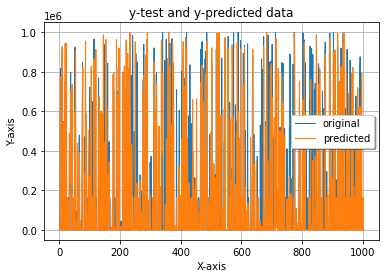

In [18]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest.iloc[:,:].values, linewidth=1, label="original")
plt.plot(x_ax, ypred_dtr, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## 2. Random Forest Regressor

In [19]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 42)

print(rf)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=42)


In [20]:
rf.fit(xtrain,ytrain)

C:\Users\muhammet.aykanat\AppData\Local\Temp\ipykernel_15884\2224009558.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [21]:
score_fr = dtr.score(xtrain,ytrain)
print("R-squared: ", score_fr)

R-squared:  0.9911442997661676


In [22]:
ypred_rf = rf.predict(xtest)

mse_rf = mean_squared_error(ytest,ypred_rf)
print("MSE: ", mse_rf)
print("RMSE: ", math.sqrt(mse_rf))

MSE:  44403927098.16724
RMSE:  210722.39344257466


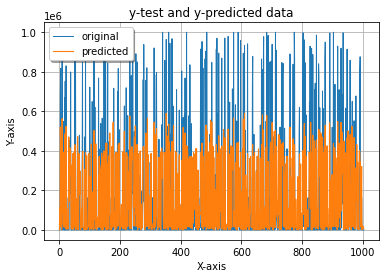

In [23]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest.iloc[:,:].values, linewidth=1, label="original")
plt.plot(x_ax, ypred_rf, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## 3. XGBoost Regressor

In [24]:
xgboost_model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
print(xgboost_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)


In [25]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(xgboost_model, xtrain, ytrain, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [28]:
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 119140.872 (4853.087)


In [30]:
xgboost_model.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [32]:
ypred_xgboost = xgboost_model.predict(xtest)

mse_xgboost = mean_squared_error(ytest,ypred_xgboost)
print("MSE: ", mse_xgboost)
print("RMSE: ", math.sqrt(mse_xgboost))

MSE:  39638348435.80165
RMSE:  199093.81817575765


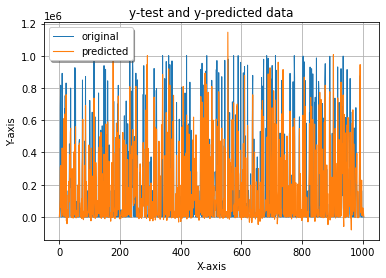

In [33]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest.iloc[:,:].values, linewidth=1, label="original")
plt.plot(x_ax, ypred_xgboost, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

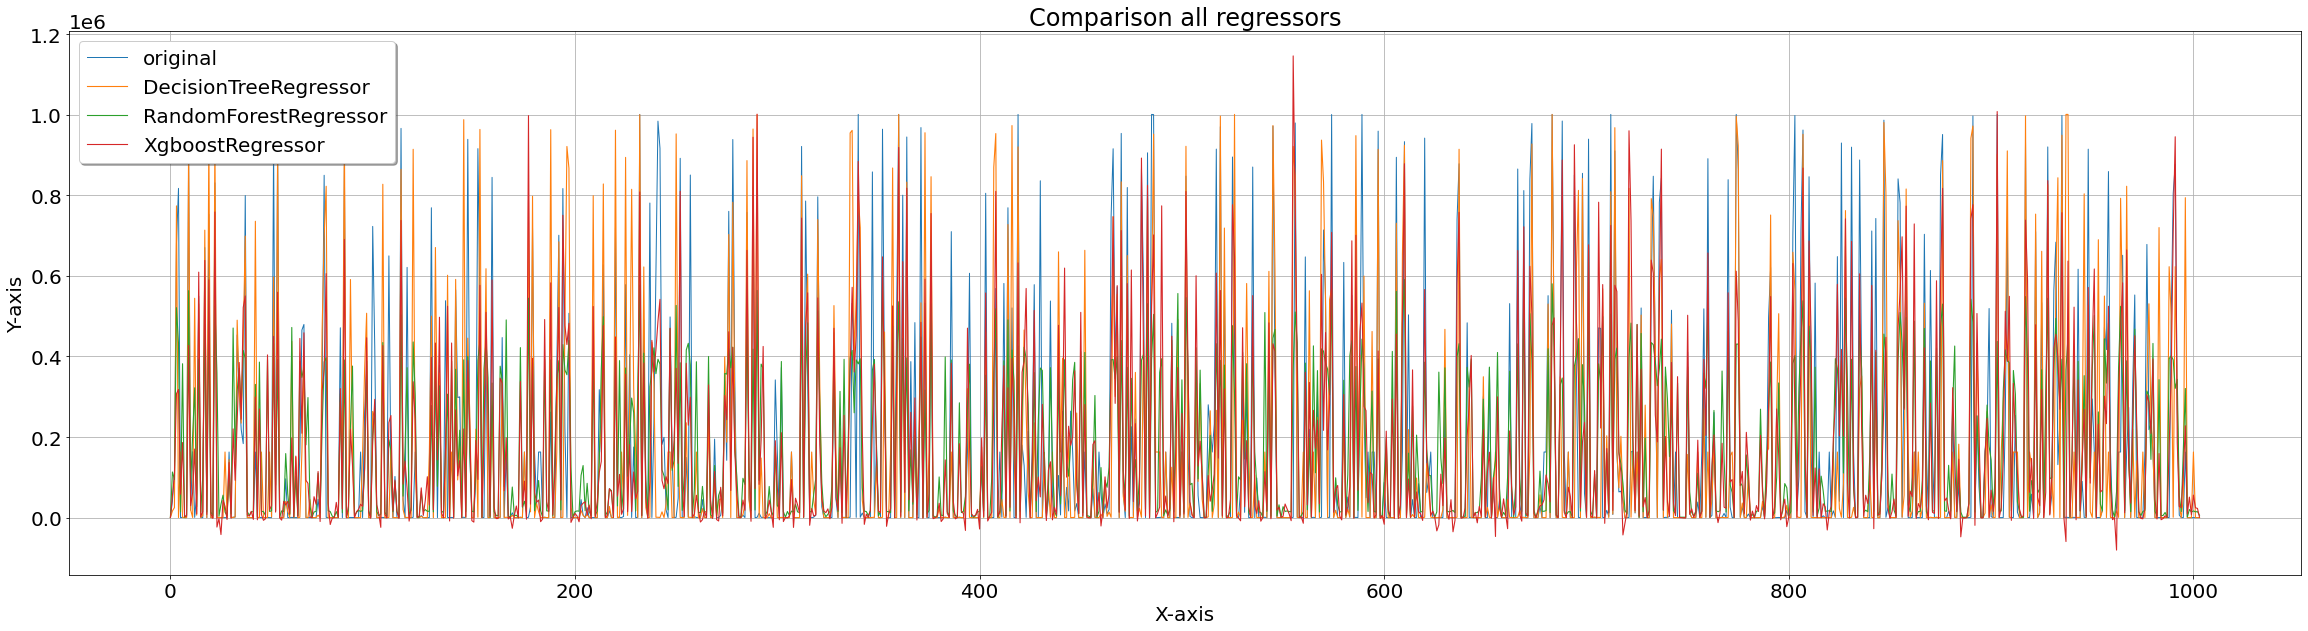

In [43]:
x_ax = range(len(ytest))
plt.rcParams['font.size'] = 20
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.plot(x_ax, ytest.iloc[:,:].values, linewidth=1, label="original")
plt.plot(x_ax, ypred_dtr, linewidth=1.1, label="DecisionTreeRegressor")
plt.plot(x_ax, ypred_rf, linewidth=1.1, label="RandomForestRegressor")
plt.plot(x_ax, ypred_xgboost, linewidth=1.1, label="XgboostRegressor")
plt.title("Comparison all regressors")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 